In [1]:
from tensorflow.keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224 

#Loads the VGG16 model 
vgg16 = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

2023-02-08 08:25:05.816377: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-08 08:25:05.816393: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-08 08:25:08.703167: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-08 08:25:08.703219: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hp): /proc/driver/nvidia/version does not exist
2023-02-08 08:25:08.703809: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enab

In [2]:
# Let's print our layers 
for (i,layer) in enumerate(vgg16.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer True
1 Conv2D True
2 Conv2D True
3 MaxPooling2D True
4 Conv2D True
5 Conv2D True
6 MaxPooling2D True
7 Conv2D True
8 Conv2D True
9 Conv2D True
10 MaxPooling2D True
11 Conv2D True
12 Conv2D True
13 Conv2D True
14 MaxPooling2D True
15 Conv2D True
16 Conv2D True
17 Conv2D True
18 MaxPooling2D True


In [3]:
from tensorflow.keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 64
img_cols = 64 

# Re-loads the VGG16 model without the top or FC layers
vgg16 = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in vgg16.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(vgg16.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [4]:
def addTopModel(bottom_model, num_classes, D=256):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Model

num_classes = 131

FC_Head = addTopModel(vgg16, num_classes)

model = Model(inputs=vgg16.input, outputs=FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/home/bikash/Desktop/keras/fruits-360/Training'
validation_data_dir = '/home/bikash/Desktop/keras/fruits-360/Test'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      )
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 10
val_batchsize = 16
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [7]:
train_generator.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

In [8]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
                   
checkpoint = ModelCheckpoint("/home/bikash/Desktop/keras/fruits-360/fruitClassifierModel.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# Note we use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples =  67692
nb_validation_samples = 22688
epochs = 10
batch_size = 16

history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/10


/home/bikash/Desktop/keras/tensorflow/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


4230/4230 [==============================] - ETA: 0s - loss: 1.7871 - accuracy: 0.5300
Epoch 1: val_loss improved from inf to 1.12667, saving model to /home/bikash/Desktop/keras/fruits-360/fruitClassifierModel.h5
4230/4230 [==============================] - 641s 151ms/step - loss: 1.7871 - accuracy: 0.5300 - val_loss: 1.1267 - val_accuracy: 0.7098
Epoch 2/10
4230/4230 [==============================] - ETA: 0s - loss: 0.8490 - accuracy: 0.7484
Epoch 2: val_loss improved from 1.12667 to 0.95674, saving model to /home/bikash/Desktop/keras/fruits-360/fruitClassifierModel.h5
4230/4230 [==============================] - 702s 166ms/step - loss: 0.8490 - accuracy: 0.7484 - val_loss: 0.9567 - val_accuracy: 0.7929
Epoch 3/10
4230/4230 [==============================] - ETA: 0s - loss: 0.7362 - accuracy: 0.7895
Epoch 3: val_loss improved from 0.95674 to 0.82343, saving model to /home/bikash/Desktop/keras/fruits-360/fruitClassifierModel.h5
4230/4230 [==============================] - 678s 160ms/s

In [9]:
d={'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grape White 4': 49,
 'Grapefruit Pink': 50,
 'Grapefruit White': 51,
 'Guava': 52,
 'Hazelnut': 53,
 'Huckleberry': 54,
 'Kaki': 55,
 'Kiwi': 56,
 'Kohlrabi': 57,
 'Kumquats': 58,
 'Lemon': 59,
 'Lemon Meyer': 60,
 'Limes': 61,
 'Lychee': 62,
 'Mandarine': 63,
 'Mango': 64,
 'Mango Red': 65,
 'Mangostan': 66,
 'Maracuja': 67,
 'Melon Piel de Sapo': 68,
 'Mulberry': 69,
 'Nectarine': 70,
 'Nectarine Flat': 71,
 'Nut Forest': 72,
 'Nut Pecan': 73,
 'Onion Red': 74,
 'Onion Red Peeled': 75,
 'Onion White': 76,
 'Orange': 77,
 'Papaya': 78,
 'Passion Fruit': 79,
 'Peach': 80,
 'Peach 2': 81,
 'Peach Flat': 82,
 'Pear': 83,
 'Pear 2': 84,
 'Pear Abate': 85,
 'Pear Forelle': 86,
 'Pear Kaiser': 87,
 'Pear Monster': 88,
 'Pear Red': 89,
 'Pear Stone': 90,
 'Pear Williams': 91,
 'Pepino': 92,
 'Pepper Green': 93,
 'Pepper Orange': 94,
 'Pepper Red': 95,
 'Pepper Yellow': 96,
 'Physalis': 97,
 'Physalis with Husk': 98,
 'Pineapple': 99,
 'Pineapple Mini': 100,
 'Pitahaya Red': 101,
 'Plum': 102,
 'Plum 2': 103,
 'Plum 3': 104,
 'Pomegranate': 105,
 'Pomelo Sweetie': 106,
 'Potato Red': 107,
 'Potato Red Washed': 108,
 'Potato Sweet': 109,
 'Potato White': 110,
 'Quince': 111,
 'Rambutan': 112,
 'Raspberry': 113,
 'Redcurrant': 114,
 'Salak': 115,
 'Strawberry': 116,
 'Strawberry Wedge': 117,
 'Tamarillo': 118,
 'Tangelo': 119,
 'Tomato 1': 120,
 'Tomato 2': 121,
 'Tomato 3': 122,
 'Tomato 4': 123,
 'Tomato Cherry Red': 124,
 'Tomato Heart': 125,
 'Tomato Maroon': 126,
 'Tomato Yellow': 127,
 'Tomato not Ripened': 128,
 'Walnut': 129,
 'Watermelon': 130}

class_labels={}
for (a,b) in enumerate(d) :
    class_labels.update({a:b})
    
class_labels


{0: 'Apple Braeburn',
 1: 'Apple Crimson Snow',
 2: 'Apple Golden 1',
 3: 'Apple Golden 2',
 4: 'Apple Golden 3',
 5: 'Apple Granny Smith',
 6: 'Apple Pink Lady',
 7: 'Apple Red 1',
 8: 'Apple Red 2',
 9: 'Apple Red 3',
 10: 'Apple Red Delicious',
 11: 'Apple Red Yellow 1',
 12: 'Apple Red Yellow 2',
 13: 'Apricot',
 14: 'Avocado',
 15: 'Avocado ripe',
 16: 'Banana',
 17: 'Banana Lady Finger',
 18: 'Banana Red',
 19: 'Beetroot',
 20: 'Blueberry',
 21: 'Cactus fruit',
 22: 'Cantaloupe 1',
 23: 'Cantaloupe 2',
 24: 'Carambula',
 25: 'Cauliflower',
 26: 'Cherry 1',
 27: 'Cherry 2',
 28: 'Cherry Rainier',
 29: 'Cherry Wax Black',
 30: 'Cherry Wax Red',
 31: 'Cherry Wax Yellow',
 32: 'Chestnut',
 33: 'Clementine',
 34: 'Cocos',
 35: 'Corn',
 36: 'Corn Husk',
 37: 'Cucumber Ripe',
 38: 'Cucumber Ripe 2',
 39: 'Dates',
 40: 'Eggplant',
 41: 'Fig',
 42: 'Ginger Root',
 43: 'Granadilla',
 44: 'Grape Blue',
 45: 'Grape Pink',
 46: 'Grape White',
 47: 'Grape White 2',
 48: 'Grape White 3',
 49: '

In [10]:
# CLASSIFICATION REPORT AND THE CONFUSION MATRIX FOR THE vgg16
# Displaying our Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib

 


#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples) # put classifier not model
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


/tmp/ipykernel_91803/2756240793.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, nb_validation_samples) # put classifier not model


Confusion Matrix
[[ 74  10   0 ...   0   0   0]
 [  0  93   0 ...   0   0   0]
 [  0   0 135 ...   0   0   0]
 ...
 [  0   0   0 ... 143   0   0]
 [  0   0   0 ...   0 249   0]
 [  0   0   0 ...   0   0 157]]
Classification Report
                     precision    recall  f1-score   support

     Apple Braeburn       1.00      0.45      0.62       164
 Apple Crimson Snow       0.56      0.63      0.59       148
     Apple Golden 1       0.88      0.84      0.86       160
     Apple Golden 2       0.80      0.80      0.80       164
     Apple Golden 3       0.59      0.58      0.59       161
 Apple Granny Smith       0.70      0.45      0.54       164
    Apple Pink Lady       0.34      0.31      0.32       152
        Apple Red 1       0.99      0.76      0.86       164
        Apple Red 2       0.74      0.71      0.72       164
        Apple Red 3       0.64      0.98      0.77       144
Apple Red Delicious       0.79      0.69      0.74       166
 Apple Red Yellow 1       0.76      

In [11]:
history.history

{'loss': [1.7870959043502808,
  0.8490163087844849,
  0.7361670732498169,
  0.7051565647125244,
  0.6893496513366699,
  0.6841850876808167,
  0.701102614402771],
 'accuracy': [0.5299583673477173,
  0.7484160661697388,
  0.7895346879959106,
  0.8069374561309814,
  0.8172703981399536,
  0.8238297700881958,
  0.8316230177879333],
 'val_loss': [1.1266688108444214,
  0.9567415118217468,
  0.8234332799911499,
  0.783939778804779,
  1.0966485738754272,
  0.8565310835838318,
  1.0476906299591064],
 'val_accuracy': [0.7098025679588318,
  0.7929301857948303,
  0.8059326410293579,
  0.8327309489250183,
  0.8182299137115479,
  0.8689174652099609,
  0.8411935567855835]}

/tmp/ipykernel_91803/3646146744.py:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, nb_validation_samples)


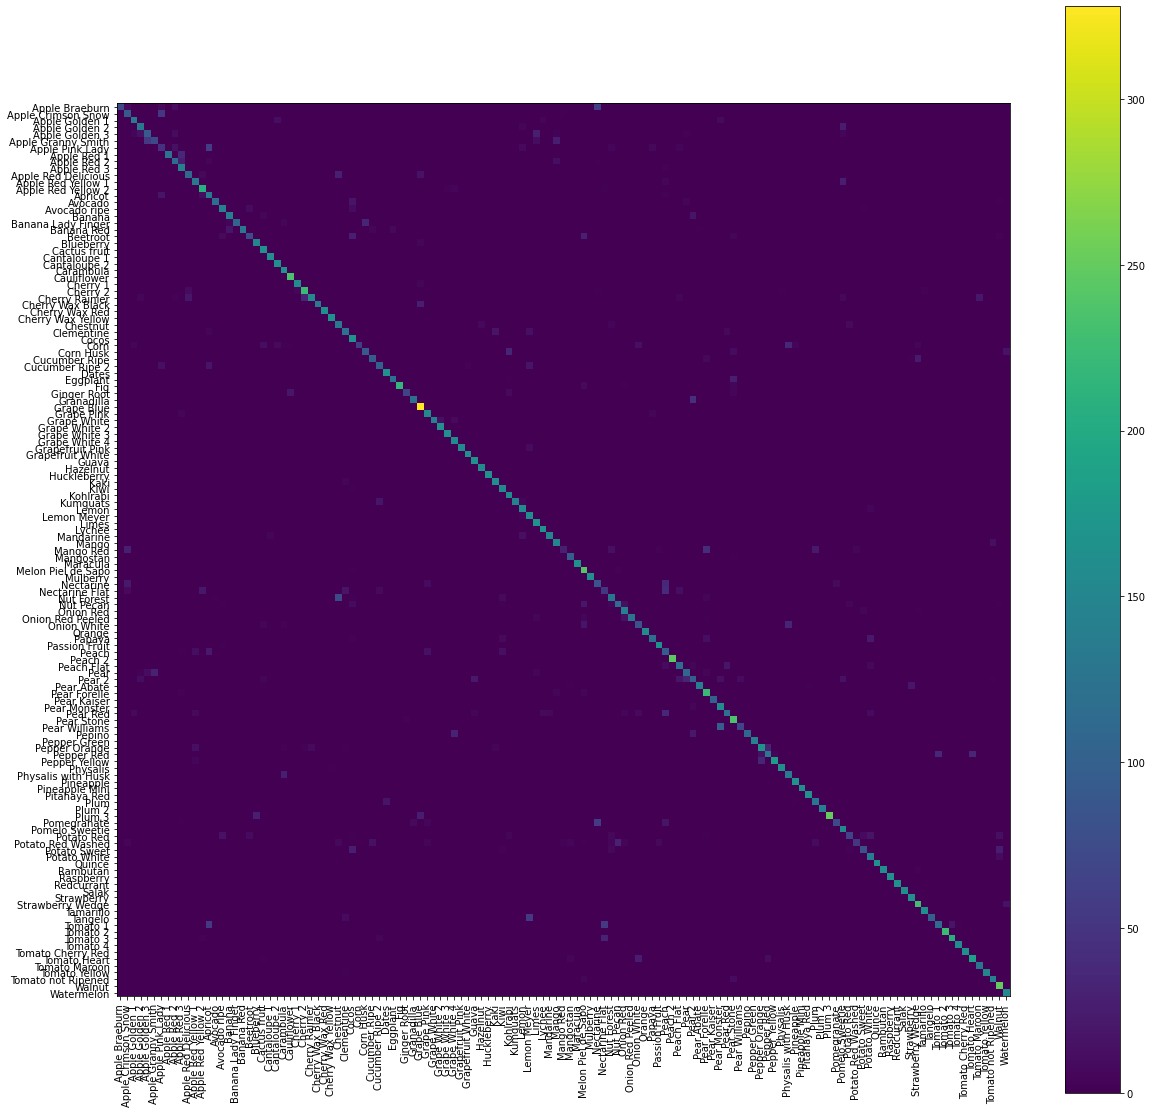

In [14]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 224,224,3
model = load_model('/home/bikash/Desktop/keras/fruits-360/fruitClassifierModel.h5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 67692
nb_validation_samples = 22688

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

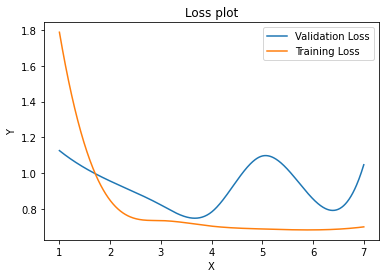

In [15]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
n = len(loss_values)
epochs = range(1, len(loss_values) + 1)
y=history_dict['loss']
y1=history_dict['val_loss']

model = make_interp_spline(epochs, y)
model1 = make_interp_spline(epochs, y1)
xs=np.linspace(1,n,500)
ys=model(xs)
ys1 = model1(xs)

plt.xlabel('Epochs') 
plt.plot(xs, ys1, label='Validation Loss')
plt.plot(xs, ys,label='Training Loss')
plt.title("Loss plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

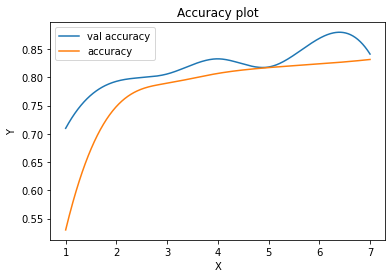

In [16]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
n = len(loss_values)
epochs = range(1, len(loss_values) + 1)
y=history_dict['accuracy']
y1=history_dict['val_accuracy']

model=make_interp_spline(epochs, y)
model1=make_interp_spline(epochs, y1)
xs=np.linspace(1,n,500)
ys=model(xs)
ys1 = model1(xs)
plt.xlabel('Epochs') 
plt.plot(xs, ys1, label='val accuracy')
plt.plot(xs, ys,label='accuracy')
plt.title("Accuracy plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

1/1 [==============================] - 0s 109ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
111
The fruit is  Quince


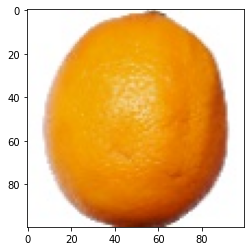

In [17]:
#Testing the models
import tensorflow
import keras
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,img_to_array

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
 
# creating a object
model = keras.models.load_model('/home/bikash/Desktop/keras/fruits-360/fruitClassifierModel.h5')

path = '/home/bikash/Desktop/keras/fruits-360/Test/Lemon Meyer/28_100.jpg'
#path = '/content/drive/MyDrive/new_set_belt/new_seat_belt_REFINED_RAW_DATASET/test/positive/opencv_frame_28 (4).png'
test_image = load_img(path,target_size = (64,64,3))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)
print(result)
res=np.argmax(result)

print(res)
# if result[0][0] == 1:
#   print("person having  no seat belt")
# else:
#   print("person having  seat belt")

# reading the image
testImage = img.imread(path)
 
# displaying the modified image
plt.imshow(testImage)

print("The fruit is ",class_labels[res])

In [ ]:
class_labels

{0: 'Apple Braeburn',
 1: 'Apple Crimson Snow',
 2: 'Apple Golden 1',
 3: 'Apple Golden 2',
 4: 'Apple Golden 3',
 5: 'Apple Granny Smith',
 6: 'Apple Pink Lady',
 7: 'Apple Red 1',
 8: 'Apple Red 2',
 9: 'Apple Red 3',
 10: 'Apple Red Delicious',
 11: 'Apple Red Yellow 1',
 12: 'Apple Red Yellow 2',
 13: 'Apricot',
 14: 'Avocado',
 15: 'Avocado ripe',
 16: 'Banana',
 17: 'Banana Lady Finger',
 18: 'Banana Red',
 19: 'Beetroot',
 20: 'Blueberry',
 21: 'Cactus fruit',
 22: 'Cantaloupe 1',
 23: 'Cantaloupe 2',
 24: 'Carambula',
 25: 'Cauliflower',
 26: 'Cherry 1',
 27: 'Cherry 2',
 28: 'Cherry Rainier',
 29: 'Cherry Wax Black',
 30: 'Cherry Wax Red',
 31: 'Cherry Wax Yellow',
 32: 'Chestnut',
 33: 'Clementine',
 34: 'Cocos',
 35: 'Corn',
 36: 'Corn Husk',
 37: 'Cucumber Ripe',
 38: 'Cucumber Ripe 2',
 39: 'Dates',
 40: 'Eggplant',
 41: 'Fig',
 42: 'Ginger Root',
 43: 'Granadilla',
 44: 'Grape Blue',
 45: 'Grape Pink',
 46: 'Grape White',
 47: 'Grape White 2',
 48: 'Grape White 3',
 49: '